In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils
import nanonets

In [150]:
def plot_freq(f, ax, min_y, max_y, N_f=5):

    ax.vlines(f, min_y, max_y, colors='black', linestyles='solid', label=f"$f_0 = {f}$ GHz")

    for n in range(2,N_f+1):
        ax.vlines(n*f, min_y, max_y, colors='#A60628', linestyles='dotted')
    
    return ax

In [151]:
step_size   = 1e-10
n_vals      = 633
N_voltages  = 20*n_vals
time        = step_size*np.arange(N_voltages)*1e9
df          = pd.read_csv("hysteresis/data/Nx=7_Ny=7_Nz=1_Ne=2.csv")
df_R        = pd.read_csv("hysteresis/data_R/Nx=7_Ny=7_Nz=1_Ne=2.csv")
df_rad      = pd.read_csv("hysteresis/data_rad/Nx=7_Ny=7_Nz=1_Ne=2.csv")

In [152]:
values      = []
time_vals   = []
last_time   = 0

for i, freq in enumerate(np.arange(1,2.1,0.1)):

    values.extend(list(np.cos(freq*time[0:int(n_vals/freq)]*1e8)))
    time_vals.extend(list(np.arange(last_time, last_time+int(n_vals/freq))))
    last_time = int(n_vals/freq)

for i, freq in enumerate(np.arange(2,0.9,-0.1)):

    values.extend(list(np.cos(freq*time[0:int(n_vals/freq)]*1e8)))
    time_vals.extend(list(np.arange(last_time, last_time+int(n_vals/freq))))
    last_time = int(n_vals/freq)

time = np.array(time_vals)[1:]
time = step_size*np.arange(len(df))*1e9

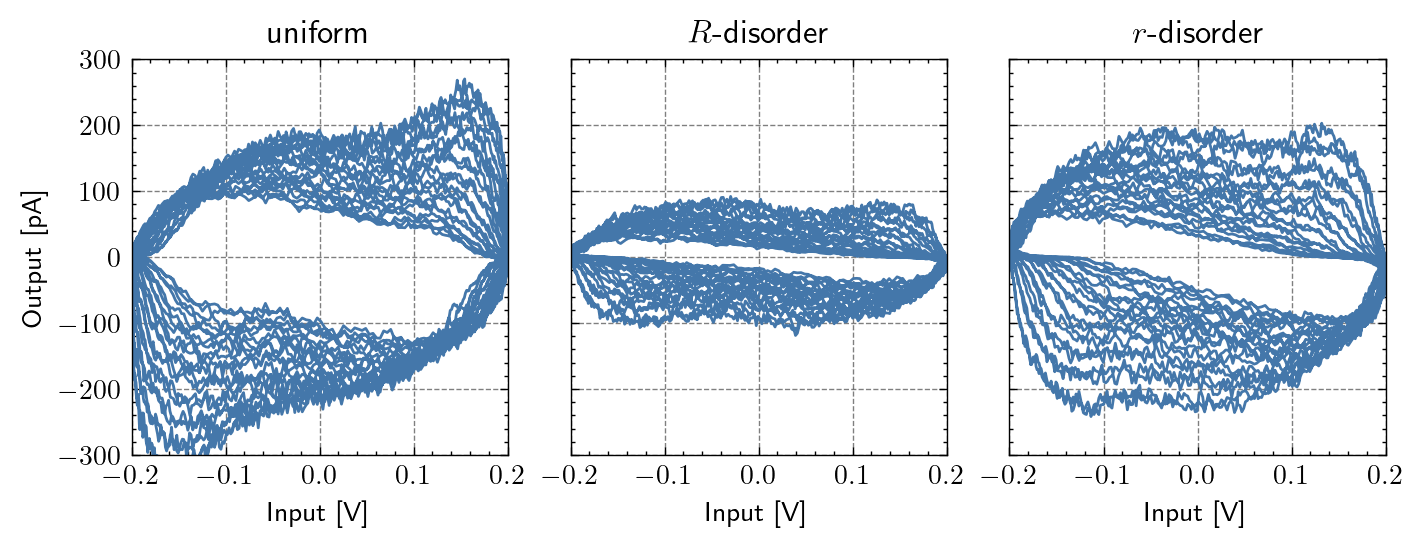

In [153]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)

    ax  = fig.add_subplot(1,3,1)
    ax.plot(df['E0'], df['Current'])
    ax.set_ylim(-300,300)
    ax.set_ylabel('Output [pA]')
    ax.set_xlabel('Input [V]')
    ax.set_xlim(-0.2,0.2)
    ax.set_title("uniform")

    ax  = fig.add_subplot(1,3,2)
    ax.plot(df['E0'], df_R['Current'])
    ax.set_ylim(-300,300)
    ax.set_xlabel('Input [V]')
    ax.set_yticklabels("")
    ax.set_xlim(-0.2,0.2)
    ax.set_title("$R$-disorder")

    ax  = fig.add_subplot(1,3,3)
    ax.plot(df['E0'], df_rad['Current'])
    ax.set_ylim(-300,300)
    ax.set_xlim(-0.2,0.2)
    ax.set_xlabel('Input [V]')
    ax.set_yticklabels("")
    ax.set_title("$r$-disorder")

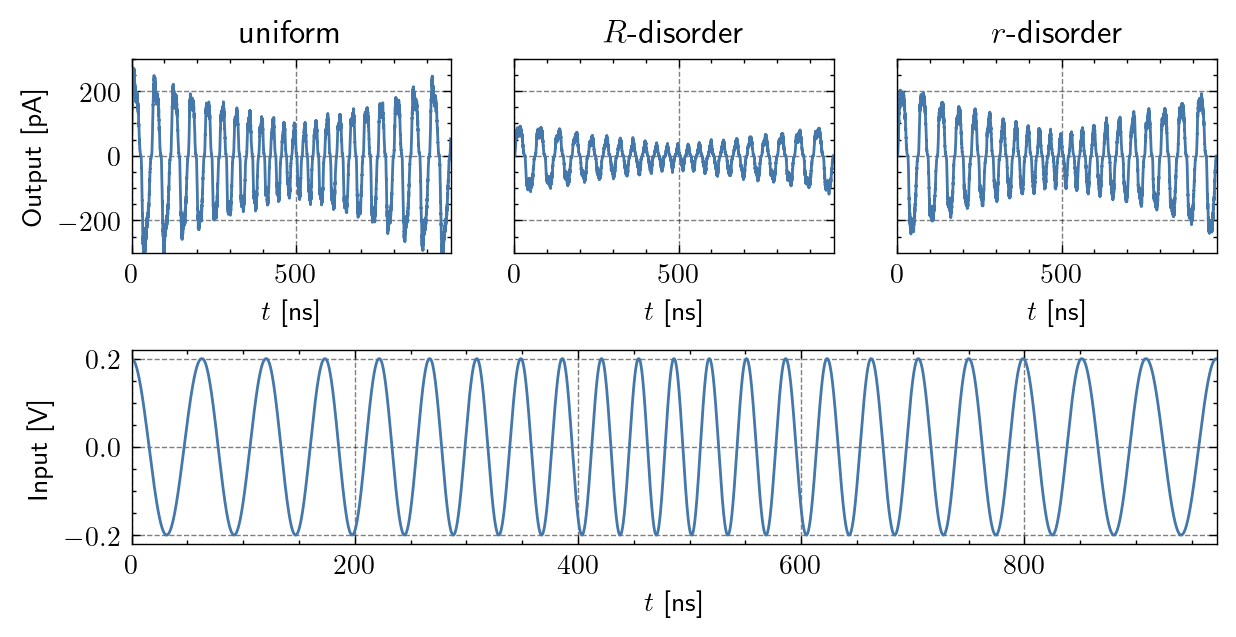

In [154]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*1.2)

    ax  = fig.add_subplot(2,3,1)
    ax.plot(time,df['Current'])
    ax.set_ylabel('Output [pA]')
    ax.set_ylim(-300,300)
    ax.set_title("uniform")
    ax.set_xlabel("$t$ [ns]")
    ax.set_xlim(0,np.max(time))

    ax  = fig.add_subplot(2,3,2)
    ax.plot(time,df_R['Current'])
    ax.set_ylim(-300,300)
    ax.set_yticklabels("")
    ax.set_title("$R$-disorder")
    ax.set_xlabel("$t$ [ns]")
    ax.set_xlim(0,np.max(time))

    ax  = fig.add_subplot(2,3,3)
    ax.plot(time,df_rad['Current'])
    ax.set_ylim(-300,300)
    ax.set_yticklabels("")
    ax.set_title("$r$-disorder")
    ax.set_xlabel("$t$ [ns]")
    ax.set_xlim(0,np.max(time))

    ax  = fig.add_subplot(2,1,2)
    ax.plot(time,df['E0'])
    ax.set_ylabel('Input [V]')
    ax.set_xlabel("$t$ [ns]")
    ax.set_xlim(0,np.max(time))

    fig.subplots_adjust(hspace=0.5)
    fig.savefig("plots/hysteresis_I_O.svg", transparent=True)

### Normiert

In [155]:
current_n          = ((df['Current'] - df['Current'].min())/(df['Current'].max()-df['Current'].min())).values
current_n_R        = ((df_R['Current'] - df_R['Current'].min())/(df_R['Current'].max()-df_R['Current'].min())).values
current_n_rad      = ((df_rad['Current'] - df_rad['Current'].min())/(df_rad['Current'].max()-df_rad['Current'].min())).values

In [156]:
cmap = plt.get_cmap('Reds')

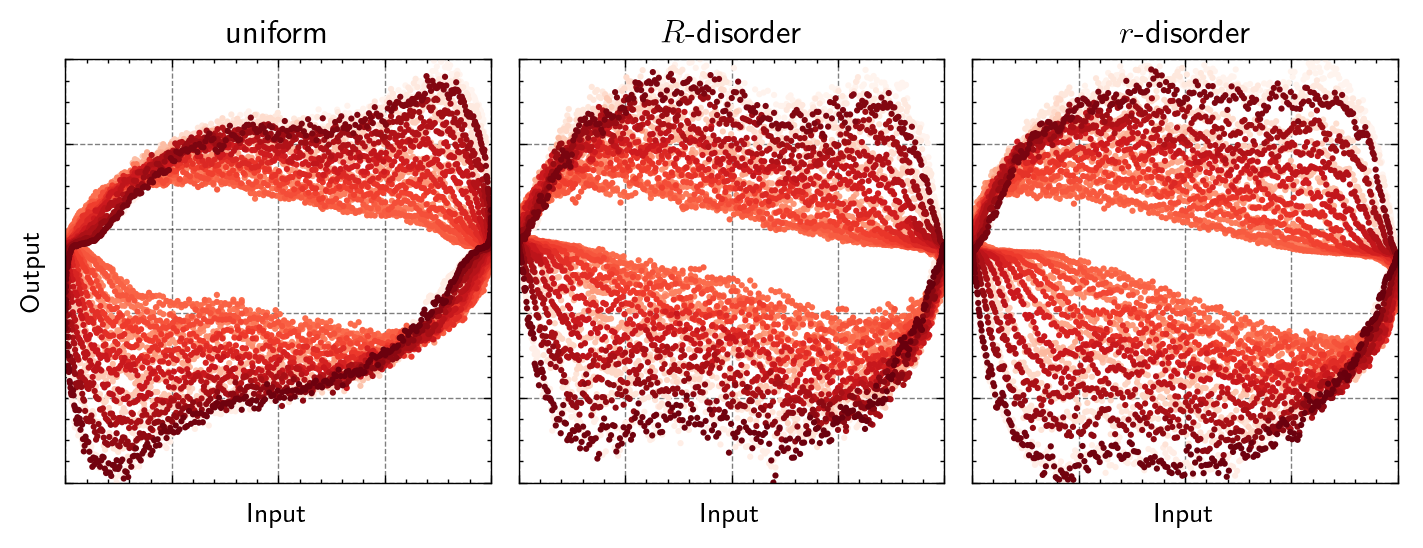

In [157]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)

    ax  = fig.add_subplot(1,3,1)
    # ax.plot(df['E0'], current_n)
    ax.scatter(df['E0'], current_n, s=5, c=cmap(np.linspace(0,1,len(current_n))), linewidths=0)
    ax.set_ylabel('Output')
    ax.set_xlabel('Input')
    ax.set_title("uniform")
    ax.set_yticklabels("")
    ax.set_xticklabels("")
    ax.set_ylim(0,1)
    ax.set_xlim(-0.2,0.2)

    ax  = fig.add_subplot(1,3,2)
    # ax.plot(df['E0'], current_n_R)
    ax.scatter(df['E0'], current_n_R, s=5, c=cmap(np.linspace(0,1,len(current_n))), linewidths=0)
    ax.set_xlabel('Input')
    ax.set_yticklabels("")
    ax.set_xticklabels("")
    ax.set_title("$R$-disorder")
    ax.set_ylim(0,1)
    ax.set_xlim(-0.2,0.2)

    ax  = fig.add_subplot(1,3,3)
    ax.scatter(df['E0'], current_n_rad, s=5, c=cmap(np.linspace(0,1,len(current_n))), linewidths=0)
    ax.set_xlabel('Input')
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    ax.set_ylim(0,1)
    ax.set_xlim(-0.2,0.2)
    ax.set_title("$r$-disorder")

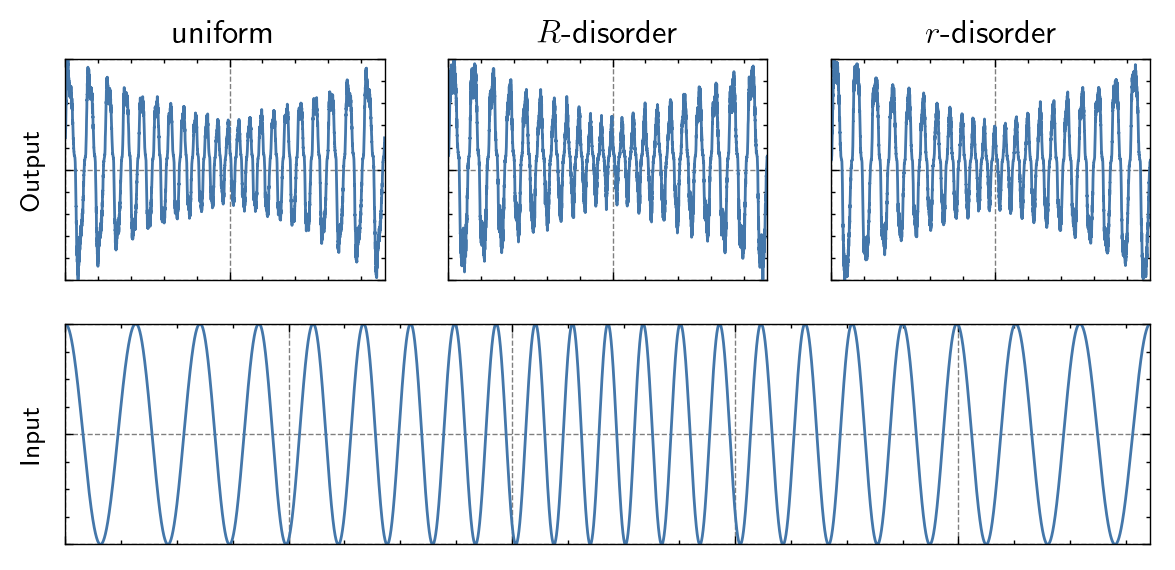

In [158]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*1.2)

    ax  = fig.add_subplot(2,3,1)
    ax.plot(time,current_n)
    ax.set_ylabel('Output')
    ax.set_ylim(0,1)
    ax.set_title("uniform")
    # ax.set_xlabel("$t$ [ns]")
    ax.set_yticklabels("")
    ax.set_xticklabels("")
    ax.set_xlim(0,np.max(time))

    ax  = fig.add_subplot(2,3,2)
    ax.plot(time,current_n_R)
    ax.set_ylim(0,1)
    ax.set_yticklabels("")
    ax.set_title("$R$-disorder")
    # ax.set_xlabel("$t$ [ns]")
    ax.set_xticklabels("")
    ax.set_xlim(0,np.max(time))

    ax  = fig.add_subplot(2,3,3)
    ax.plot(time,current_n_rad)
    ax.set_ylim(0,1)
    ax.set_yticklabels("")
    ax.set_title("$r$-disorder")
    # ax.set_xlabel("$t$ [ns]")
    ax.set_xticklabels("")
    ax.set_xlim(0,np.max(time))

    ax  = fig.add_subplot(2,1,2)
    ax.plot(time,df['E0'])
    ax.set_ylabel('Input')
    # ax.set_xlabel("$t$ [ns]")
    ax.set_yticklabels("")
    ax.set_xticklabels("")
    ax.set_xlim(0,np.max(time))
    ax.set_ylim(-0.2,0.2)

    # fig.subplots_adjust(hspace=0.5)
    # fig.savefig("plots/hysteresis_I_O.svg", transparent=True)